# **Trip Advisor hotel reviews**
## MACHINE LEARNING MODELS
***
***

In [1]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# ML packages
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# set no limit to raw display with pandas
pd.set_option('display.max_rows', None)

# define working paths
PROJECT_PATH = os.getcwd()
RAWDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'raw')
PROCDATA_PATH = os.path.join(PROJECT_PATH, os.pardir, 'data', 'proccessed')
IMAGES_PATH = os.path.join(PROJECT_PATH, os.pardir, 'images')

In [2]:
# read raw data
file_1 = os.path.join(PROCDATA_PATH, "clean_reviews_data.csv")
df_reviews = pd.read_csv(file_1)


In [3]:
df_reviews.head()

,clean_review,rating
0,nice hotel expens park got good deal stay hote...,4
1,ok noth special charg diamond member hilton de...,2
2,nice room experi hotel monaco seattl good hote...,3
3,uniqu great stay wonder time hotel monaco loca...,5
4,great stay great stay went seahawk game awesom...,5


## Machine leargnig models
***

In [4]:
### Creating a python object of the class TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=400, min_df=0.05, max_df=0.9)
X = tfidfconverter.fit_transform(df_reviews['clean_review']).toarray()
y = df_reviews["rating"]

In [5]:
# the shape
print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (20491, 307)
y: shape  (20491,)


In [10]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (14343, 307)
X Test  :  (6148, 307)
Y Train :  (14343,)
Y Test  :  (6148,)


### Balancing data

In [11]:
# Since our target variable is not balanced, we will use SMOTE algorithm to upsample the minority classes.

print("Before Upsampling:-")
print(Counter(y_train))

# Let's use SMOTE to oversample
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

print("After Upsampling:-")
print(Counter(y_train))


Before Upsampling:-
Counter({5: 6338, 4: 4262, 3: 1508, 2: 1240, 1: 995})
After Upsampling:-
Counter({5: 6338, 1: 6338, 3: 6338, 4: 6338, 2: 6338})


### Generating ML models

In [13]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****************************************************************************************************
****************************************************************************************************
Accuracy of LogisticRegression(): 0.55644111906311
              precision    recall  f1-score   support

           1       0.66      0.47      0.55       599
           2       0.33      0.30      0.31       602
           3       0.44      0.33      0.38       900
           4       0.46      0.50      0.48      1623
           5       0.68      0.76      0.72      2424

    accuracy                           0.56      6148
   macro avg       0.51      0.47      0.49      6148
weighted avg       0.55      0.56      0.55      6148




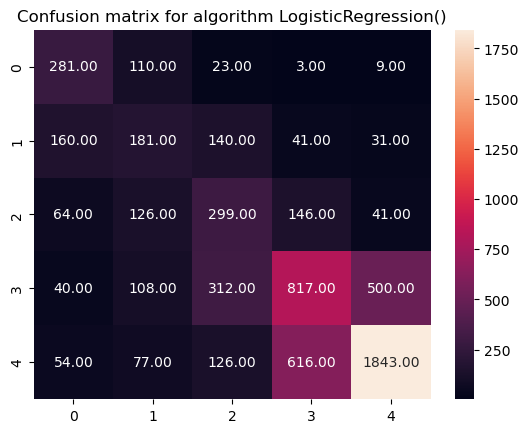

****************************************************************************************************
****************************************************************************************************
Accuracy of DecisionTreeClassifier(): 0.41070266753415746
              precision    recall  f1-score   support

           1       0.37      0.29      0.33       546
           2       0.23      0.19      0.21       670
           3       0.22      0.20      0.21       751
           4       0.35      0.36      0.36      1726
           5       0.54      0.60      0.57      2455

    accuracy                           0.41      6148
   macro avg       0.34      0.33      0.33      6148
weighted avg       0.40      0.41      0.40      6148




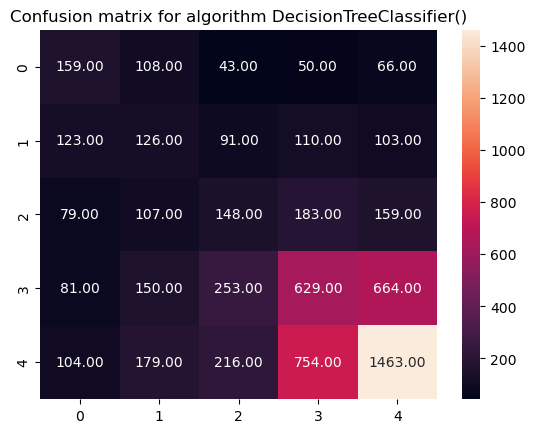

****************************************************************************************************
****************************************************************************************************
Accuracy of RandomForestClassifier(): 0.534320104098894
              precision    recall  f1-score   support

           1       0.56      0.48      0.52       491
           2       0.22      0.30      0.25       407
           3       0.21      0.33      0.26       440
           4       0.42      0.46      0.44      1625
           5       0.75      0.64      0.69      3185

    accuracy                           0.53      6148
   macro avg       0.43      0.44      0.43      6148
weighted avg       0.57      0.53      0.55      6148




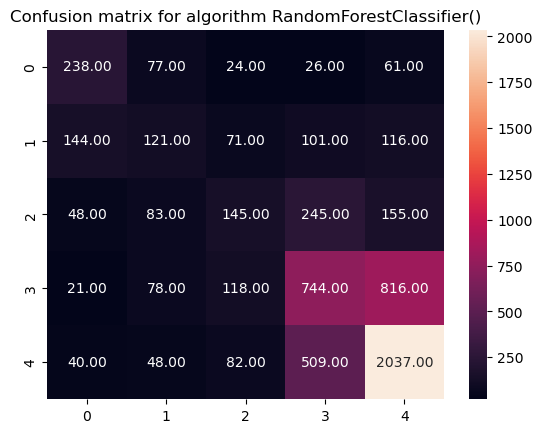

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


****************************************************************************************************
****************************************************************************************************
Accuracy of KNeighborsClassifier(): 0.20217957059206246
              precision    recall  f1-score   support

           1       0.53      0.18      0.27      1212
           2       0.35      0.13      0.19      1446
           3       0.39      0.13      0.20      2005
           4       0.27      0.34      0.30      1381
           5       0.03      0.83      0.06       104

    accuracy                           0.20      6148
   macro avg       0.31      0.32      0.21      6148
weighted avg       0.37      0.20      0.23      6148




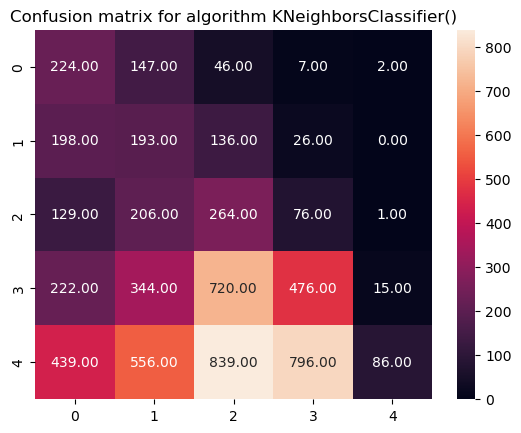

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


****************************************************************************************************
****************************************************************************************************
Accuracy of MultinomialNB(): 0.5336694860117112
              precision    recall  f1-score   support

           1       0.63      0.49      0.55       551
           2       0.38      0.26      0.31       799
           3       0.41      0.32      0.36       873
           4       0.44      0.49      0.46      1599
           5       0.64      0.75      0.69      2326

    accuracy                           0.53      6148
   macro avg       0.50      0.46      0.47      6148
weighted avg       0.52      0.53      0.52      6148




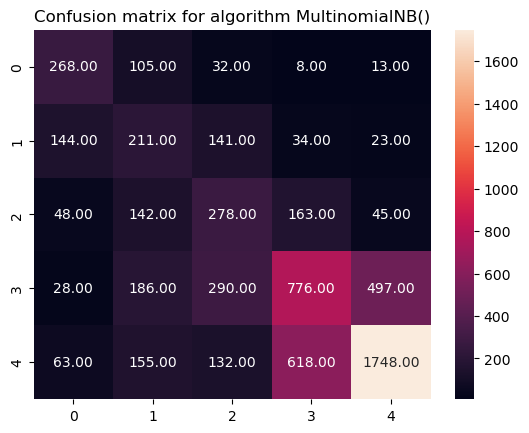

In [51]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)

    print("*"*100)
    print("*"*100)
    print(f"Accuracy of {i}:",accuracy_score(y_test, y_pred))
    print(classification_report(y_pred,y_test))
    print("")    

    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='.2f')
    plt.title(f"Confusion matrix for algorithm {i}")
    plt.savefig(os.path.join(IMAGES_PATH, f"confusion_matrix_{i}.png"))
    plt.show()
    
    d.update({str(i):i.score(X_test,y_test)*100})

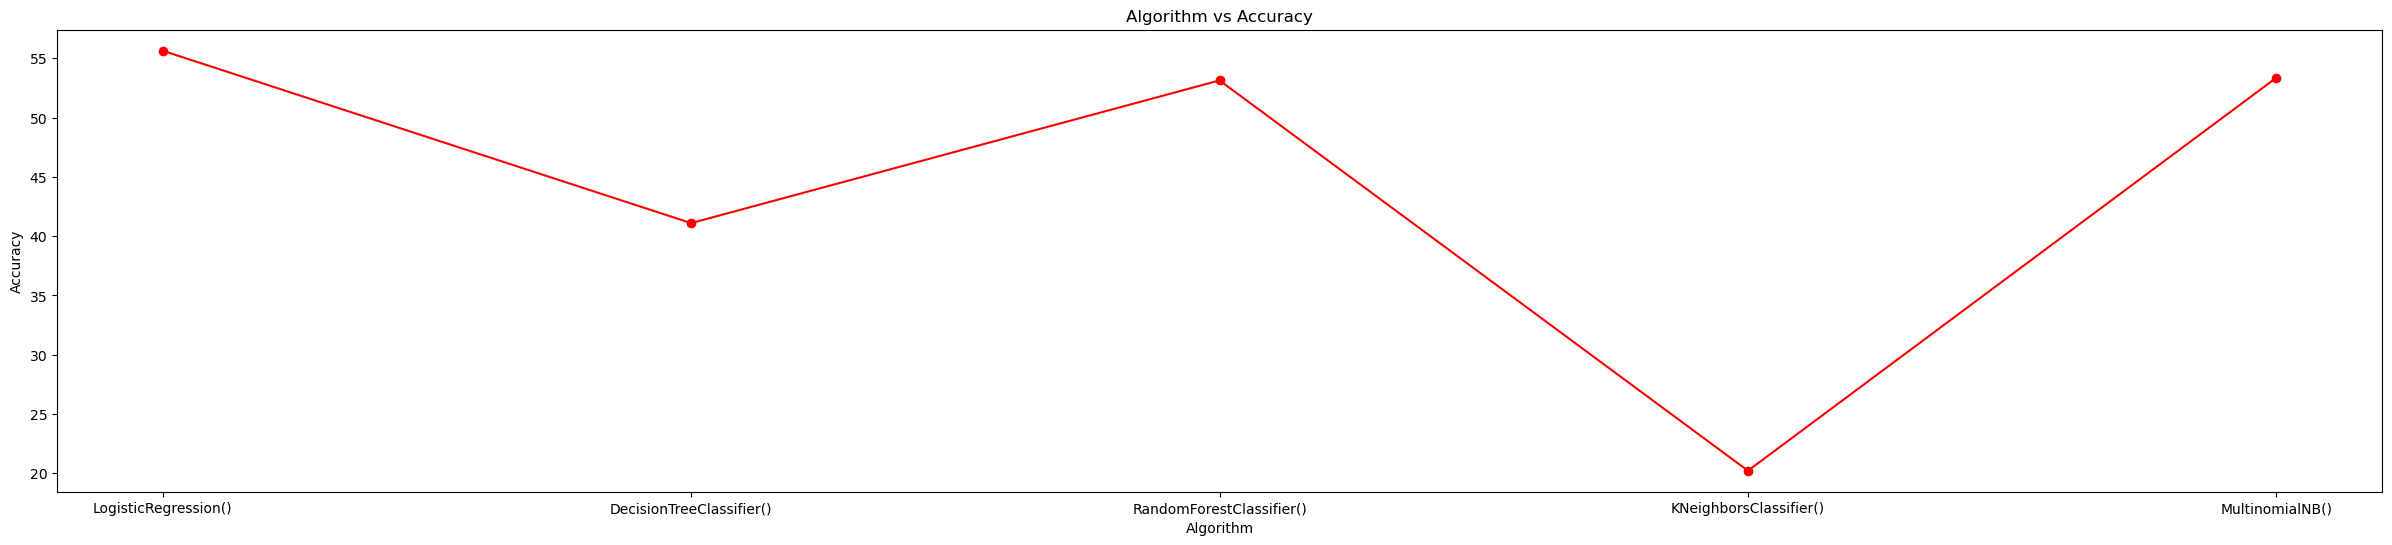

In [50]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.savefig(os.path.join(IMAGES_PATH, f"algorithms_accuaracy_comparisson.png"))
plt.show()


### Optimizing logistic regression

In [38]:
# grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.626065 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.625981 (0.008078) with: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.625697 (0.007943) with: {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.618208 (0.007552) with: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.626044 (0.008022) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.626065 (0.007807) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.618218 (0.007497) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.625707 (0.007873) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.625897 (0.008159) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.617671 (0.007853) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.625360 (0.006799) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.625350 (0.006703) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.616062 (0.007436) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.609225 (0.007492) with

c:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****************************************************************************************************
****************************************************************************************************
Accuracy of LR_opt: 0.5507482108002603
              precision    recall  f1-score   support

           1       0.64      0.48      0.55       564
           2       0.35      0.31      0.32       623
           3       0.42      0.31      0.36       928
           4       0.45      0.49      0.47      1612
           5       0.68      0.76      0.72      2421

    accuracy                           0.55      6148
   macro avg       0.51      0.47      0.48      6148
weighted avg       0.54      0.55      0.54      6148




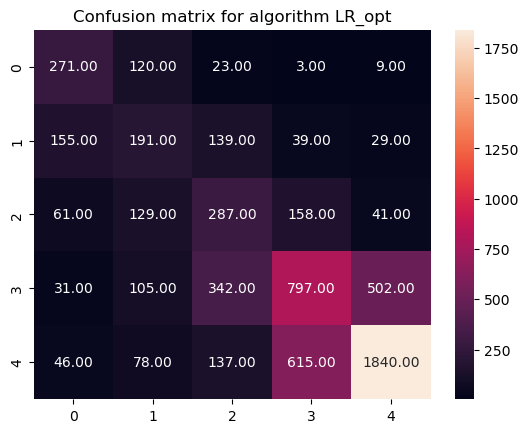

<Figure size 640x480 with 0 Axes>

In [49]:
LR_opt = LogisticRegression(C=100, penalty='l2', solver='lbfgs', multi_class='multinomial')

LR_opt.fit(X_train,y_train)
y_pred = LR_opt.predict(X_test)

print("*"*100)
print("*"*100)
print(f"Accuracy of LR_opt:",accuracy_score(y_test, y_pred))
print(classification_report(y_pred,y_test))
print("")    

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='.2f')
plt.title(f"Confusion matrix for algorithm LR_opt")
plt.show()
plt.savefig(os.path.join(IMAGES_PATH, f"confusion_matrix_LR_opt.png"))